<a href="https://colab.research.google.com/github/osadly/IBM-Data-Science-Professional-Certificate/blob/master/Assignment01_lastver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 **<font color="blue"> (15 points )<font>**

------
### Notes and Instructions
  + You may need additional libraries besides the Python standard library to solve some questions. Import only necessary libraries.
  + If more than one library exist for a same purpose, choose the one you wish as long as it does the task properly.
  + If we want you to use a specific library, then we will state it clearly.
  + Use the exact variable names asked in the questions. When no clear instructions given, feel free to do it the way you would like to.
  + After each question, add the needed number of new cells and place your answers inside the cells.
  + Use text cells for explanations. Use explanation and plain text as much as possible.
  + Do not remove or modify the original cells provided by the instructor.
  + In the following cell you will find some extra options to make your code more readable, including output colors RED, OKBLUE, or output text styles like BOLD or UNDERLINE that. Do not hesitate to use them. As an example, one may output text in red as follows:
  ```python
     print(bcolors.RED + "your text" + bcolors.ENDC)
  ```
  + Comment your code whenever needed using # sign at the beginning of the row.
  + In some questions some of the details needed for solving the problem are **purposely** omitted to encourage additional self-directed research. This, especially, helps you develop some search skills for coding in Python (which is inevitable due to the inconsistent syntax of Python).
  + Do not hesitate to communicate your questions to the TA's or instructors. Good luck!  
  

In [1]:
# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

## Question 1 <font color="blue">(1 point)</font>

  1. **<font color="blue">(0.5 points)</font>** Write a Python **function** that takes two **positive integers** and returns their **greatest common divisor**. In case you pass a negative integer to the function it must return the following string **in red**: <br> <font color="red"> "This function takes only positive integers!" </font>
  2. **<font color="blue">(0.5 points)</font>** Write a function that prints all the prime numbers less than or equal to $n$, where $n$ is a parameter to be passed to the function. If $n \leq 1$ the function returns <br>
<font color="red">"No prime number was found!"</span>.

### Answer to Q1.1 Write a Python **function** that takes two **positive integers** and returns their **greatest common divisor**. In case you pass a negative integer to the function it must return the following string **in red**: "This function takes only positive integers!"

In [2]:
# function name _gcd_
# cases are:
# gcd(0,0) = gcd (a,0) = gcd (0,b) = 0 => if one of the numbers is 0 return 0
# gcd (1,1) = gcd(a,1) = gcd(1,b) = 1 => if one of the numbers is 1 return 1
# general case: gcd (a,b):
### gcd(a,a) = a => ex.: gcd(13,13) = 13
### gcd(5,3) = gcd(3,5) = 1 => a&b has no common factor
### gcd(15,3) = gcd()
def _gcd_(a,b):
    if (a<0 or b<0): # if any of the passed arguments is negative, return error message
        return "\033[91mThis function takes only positive integers!\n"

    # reorder the passed parameters
    bg,sml=max(a,b),min(a,b)

    # if any of the passed numbers is zero (or if both numbers are zero), return the other number as the final result gcd(0,1)=gcd(0,0)=0
    if (sml==0):
        return bg

    while True:
        # iterate till we have one of the numbers (smallest is one => return 1 in this case) or,
        # if both numbers are equal (return any of the numbres in this case)
        if sml in [1,bg]:
            return sml
        # else if none of the above two conditions met, theniterate again using
        # the [remainder of the big number & the small number (bg%sml)] => first argument and
        # [the smallest number=>sml] as second arument
        return _gcd_(int(bg%sml),sml)

# validation
# first for negative number(s)
print(_gcd_(-1,0))
print(_gcd_(-1,-3))
print(_gcd_(0,-5))

# validate/test for 10000 pairs of numbers [randomaly generated ] - dispaly error message in case of any non-match found between sam_gcd and math.gcd
import math
import random
bSuccess=True
for _ in range(10000):
    # us wide range to cover as many different pairs as possible
    a,b=random.randint(0,9999999),random.randint(0,9999999)

    math_gcd = math.gcd(a,b)
    my_gcd = _gcd_(a,b)

    # report difference(s) if found
    if (math_gcd != my_gcd):
        print("Difference Found @" , a,b,math.gcd(a,b), _gcd_(a,b))
        bSuccess=False

# if bSuccess not changed to False, then we are good :)
if bSuccess:
    print("Hooray ! Validation Successfully Completed ! Results for my _gcd_ function matching the results from the seeded gcd function for 10000 randomly generated pairs of numbers")


This function takes only positive integers!

This function takes only positive integers!

This function takes only positive integers!

Hooray ! Validation Successfully Completed ! Results for my _gcd_ function matching the results from the seeded gcd function for 10000 randomly generated pairs of numbers


### Answer to Q1.2 Write a function that prints all the prime numbers less than or equal to  n , where  n  is a parameter to be passed to the function. If n≤1  the function returns "No prime number was found!"

In [3]:
import math
def _print_all_prms_ls_n_(n): # implement using "sieve of eratosthenes: https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes"
  if n<=1: # print message as requested in case n<=1
    print("\033[91mNo prime number was found!\n")
    return

  # Step 1: Initialization - mark all numbers as prime up to n except 0 & 1
  prime_array = [True] * (n + 1)
  prime_array[0] = prime_array[1] = False  # 0 and 1 are not primes

  # Step 2: Falg non-prime numbers as False in the prime_array list
  # for example : for number 2: 2*2, 2*3, 2*4, ....n+1 then for number 3: 3*3,3*4,3*5,... - then NOT 4
  # because it is already marked as False (2*2) then for 5: 5*5, 5*6,...
  nmbr = 2
  while nmbr * nmbr < n+1:
      if prime_array[nmbr]:
          for i in range(nmbr * nmbr, n + 1, nmbr):
              prime_array[i] = False
      nmbr += 1

  # Step 3: Extract the list of primes for elements in prime_array that are still True / (not changed to False based on above test)
  primes = [i for i, is_prime in enumerate(prime_array) if is_prime]
  return primes


_print_all_prms_ls_n_(-101)
len(_print_all_prms_ls_n_(1000000))
# validation
#_print_all_prms_ls_n_(-1)
#_print_all_prms_ls_n_(17)
#_print_all_prms_ls_n_(1000)
#_print_all_prms_ls_n_(1000*1000)

No prime number was found!



78498

## Question 2 <font color="blue">(6 points)</font>
Let $\mathbf X\sim \mbox{Exp}(\lambda)$, with parameter $\lambda = 1.2$.
  1. **<font color="blue">(0.5 points)</font>** What is the population mean?
  2. **<font color="blue">(1 point)</font>**  Generate $100$ different samples of $\mathbf X$, namely, $S_{100}, S_{200}, S_{300}, \dots, S_{10000}$, where indeces denote the number of observations (sample size) in each sample.
  3. **<font color="blue">(1.5 points)</font> Estimate** the population mean using each sample and explain the rationale behind your estimation.
  4. **<font color="blue">(1 point)</font>** Applying **appropriate** methods visualize and describe the values obtained in the previous step.
  5. **<font color="blue">(2 points)</font>** Finally, draw an inference about the population mean and its relation with sample means, based on visualized results in step 4.

In [4]:
#1. What is the population mean?
# get_exp_population_mean is a function to return the mean of Exponetial Distribution given the rate parameter: lambda_
# it return 1/lambda_
def get_exp_population_mean(lambda_):
    if lambda_<=0:
        return "Error ! the rate parameter must be positive"
    return 1/lambda_

# generate mean as per given data => lambda_in_question=1.2
lambda_in_question=1.2
exp_pop_mean = get_exp_population_mean(lambda_in_question)
print(exp_pop_mean)

0.8333333333333334


In [5]:
#2. Generate different samples of X ....
# import required library
import numpy as np

#create a list for all sizes from 100 to 10000 : sample_sizes
sample_sizes=[sz for sz in range(100,10001,100)]
#print(len(sample_sizes))

# use numpy to generate samples with different sizes
rng = np.random.default_rng(seed=47)

# store samples in a list of lists S_ where S_[0] is for sample S100, S_[1] is for sample S200 ,.... S_[99] is for sample S10000
# in general S_[n] = S(n+1)*100
# Also, each sample size (=> number of elements => count of observations in each sample) is also equal to S(n+1)*100
# for example: S_[10] has sample size of (10+1)*100=1100 observations
S_ = []
for each_sample_size in sample_sizes:
    S_.append(rng.exponential(scale=exp_pop_mean, size=each_sample_size))

# validation
#for each_smpl in S_:
#    print(len(each_smpl))

#S_[0]

In [6]:
# 3. Estimate the population mean using each sample and explain the rationale behind your estimation.
def calc_sample_mean(sample_):
    return np.mean(sample_)

# As the sample size increases, the sample mean approaches/converges to the population mean [Law of Large Numbers]
# This implies that with a sufficiently large sample, the sample mean becomes a more precise estimator of the population mean
y_exp_sample_means = []
#abs_mean_diff_sample_pop = []
for each_sample in S_:
    #print(calc_sample_mean(each_sample))
    exp_sample_mean=calc_sample_mean(each_sample)
    y_exp_sample_means.append(exp_sample_mean)
    #abs_mean_diff_sample_pop.append(abs(exp_pop_mean-exp_sample_mean))
    #print("in a sample size of", len(each_sample), ": the sample mean is", exp_sample_mean, "while the population mean is", exp_pop_mean,"So, accuarcy =", abs(round((exp_pop_mean-exp_sample_mean)/exp_pop_mean * 100,1)),"%")

Text(0.5, 0, 'Sample Size')

Text(0, 0.5, 'Smple Mean - Estimated Population Mean')

Text(0.5, 1.0, 'How sample size affects the accuracy of \n calculating population mean based on sample mean')

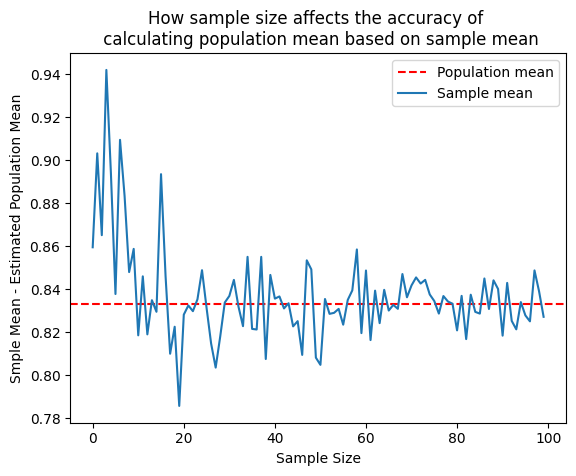

In [7]:
# 4. Applying appropriate methods visualize and describe the values obtained in the previous step
#y_exp_sample_means
import matplotlib.pyplot as plt

# Add population mean line and sample mean plot
#sns.lineplot(x=sample_sizes,y=y_exp_sample_means)
plt.axhline(exp_pop_mean,ls='--',color='r')
plt.plot(y_exp_sample_means,'-')
#plt.text(5000,exp_pop_mean,"Population Mean",color='r',weight="bold",fontsize=16)
plt.legend(labels=["Population mean","Sample mean"], loc='upper right')
#sns.scatterplot(x=sample_sizes,y=y_exp_sample_means)
#sns.scatterplot(x=sample_sizes,y=abs_mean_diff_sample_pop)

plt.xlabel("Sample Size")
plt.ylabel("Smple Mean - Estimated Population Mean")
plt.title('How sample size affects the accuracy of \n calculating population mean based on sample mean')

#sns.regplot(x,y)
plt.show()

## 5. Finally, draw an inference about the population mean and its relation with sample means, based on visualized results in step 4.
### Using a scatter plot, we can visualize the relationship between sample size and the calculated absolute difference between the sample mean and the population mean
### Inference: From the chart, it is clear that a large enough sample mean will bring the sample mean closer to the population mean.

### In other words, the above visualization supports the inference that for a random large sample,  we can use the sample mean to estimate the population mean.


## Question 3 <font color="blue">(8 points)</font>
In this exercise you will create some simulated data and will fit simple
linear regression models to it. Make sure to fix the seed to $111$ prior to
starting.
  
  1. **<font color="blue">(0.25 points)</font>** Create a vector `x` containing $100$ observations drawn from a $\mathcal{N}(0, 1)$ distribution as your feature.
  2. **<font color="blue">(0.25 points)</font>** Create a vector, `eps` (for $\epsilon$), containing $100$ observations drawn from a $\mathcal{N}(0, 0.25)$.
  3. **<font color="blue">(0.5 points)</font>** Using `x` and `eps` generate a vector `y` according to the model $y = −1 + 0.5x + \epsilon$.
  4. **<font color="blue">(0.5 points)</font>** Create a scatterplot displaying the relationship between `x` and `y`. Comment on what you observe.
  5. **<font color="blue">(2 points)</font>** Fit a least squares linear model to predict `y` using `x` . Comment on the model obtained. How do $\hat{\beta}_0$ and $\hat{\beta}_1$ compare to $\beta_0$ and $\beta_1$?
  6. **<font color="blue">(2 point)</font>** Display the least squares line on the scatterplot obtained in part 4. Draw the population regression line on the plot, in a different color. Create an appropriate legend.
  7. **<font color="blue">(2.5 points)</font>** Explain how the result would change if you generate the data with less noise and repeat all steps 1 to 6? What about more noise?

In [8]:
# import libraries as needed
import pandas as pd
from scipy.stats import norm
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [9]:
# Make sure to fix the seed to 111  prior to starting
rng = np.random.default_rng(seed=111)

# define variables to be used later for mean & std
size_x = size_eps=100
mean_x = mean_eps = 0
std_x = 1
std_eps = 0.25

In [10]:
# 1- Create a vector x containing 100 observations drawn from a N(0,1) distribution as your feature
x=norm.rvs(loc=mean_x,scale=std_x,size=size_x,random_state=rng)
#np.mean(x)
#np.std(x)
#plt.hist(x,bins=20)

In [11]:
# 2- Create a vector eps containing 100 observations drawn from a N(0,0.25)
eps=norm.rvs(loc=mean_eps,scale=std_eps,size=size_eps,random_state=rng)
#np.mean(eps)
#np.std(eps)
#plt.hist(eps,bins=20)

In [12]:
# 3- Using x and eps generate a vector y according to the model -1+0.5x+eps
b0 = -1
b1 = 0.5
y=b0+b1*x+eps

#y
#np.mean(y)
#np.std(y)
#plt.hist(y,bins=20)

<Axes: >

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

Text(0.5, 1.0, 'A scatterplot displaying the relationship between x and y \n With Correlation Coefficient=0.8882')

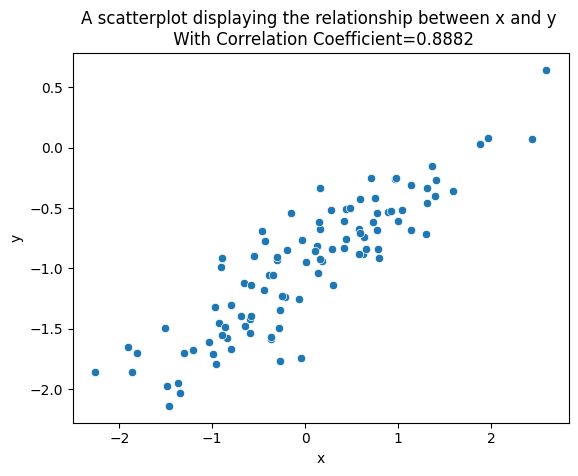

In [13]:
# 4- Create a scatterplot displaying the relationship between x and y. Comment on what you observe
sns.scatterplot(x=x,y=y)
plt.xlabel("x")
plt.ylabel("y")
plt.title('A scatterplot displaying the relationship between x and y \n With Correlation Coefficient=' + str(round(np.corrcoef(x, y)[0,1],4)))
plt.show()

# get Pearson correlation coefficient between x & y
#np.corrcoef(x, y)[0,1]

## Comments based on my observation:
The scatter plot shows that there is a strong positive correlation between the two vectors x and y [which is expected based on the given equation to generate y. <b><i>y=-1+0.5*x+eps</i></b>]

In [14]:
# 5-  Fit a least squares linear model to predict y using x . Comment on the model obtained. How do claculated/predicted coefficients compared to real coefficients ?
my_dict = { 'x_col' : x, 'y_col' : y }
my_df = pd.DataFrame(data=my_dict)
#my_df.head()
lm=LinearRegression()
lm.fit(X=my_df[['x_col']],y=my_df[['y_col']])

# Evaluate Model Performance / Check value of R^2 to see quality of fit :
#print(lr.score(X=my_df[['x_col']],y=my_df[['y_col']]))

LinearRegression()

# How do $\hat{\beta}_{0}, \hat{\beta}_{1} $ coefficients compared to ${\beta}_{0}, {\beta}_{1} $ (_real_intercept_ = -1, _real_coeff_ = 0.5) ?


In [15]:
b0_hat = lm.intercept_[0]
b1_hat = lm.coef_[0][0]
print("b0=", b0, ", b0_hat=",b0_hat,"diff=", round(abs((b0_hat-b0)/b0) * 100,2) , "%")
print("b1=", b1, ", b1_hat=",b1_hat,"diff=" , round(abs((b1_hat-b1)/b1) * 100,2), "%")

b0= -1 , b0_hat= -0.9846266618057191 diff= 1.54 %
b1= 0.5 , b1_hat= 0.5041381915925813 diff= 0.83 %


<Axes: >

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

Text(0.5, 1.0, 'A scatterplot displaying the relationship between x and y')

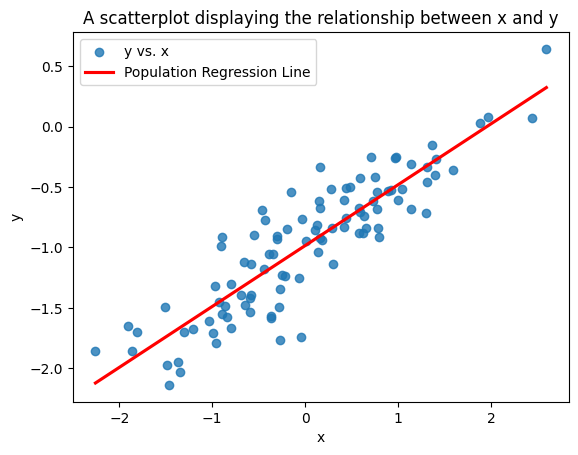

In [16]:
# 6- Display the least squares line on the scatterplot obtained in part 4. Draw the population regression line on the plot, in a different color.
# Create an appropriate legend.
sns.regplot(x=x,y=y,ci=None,line_kws=dict(color="r"))
plt.xlabel("x")
plt.ylabel("y")
plt.title('A scatterplot displaying the relationship between x and y')

#sns.regplot(x,y)
plt.legend(labels=['y vs. x','Population Regression Line'])
plt.show()

## 7-Explain how the result would change if you generate the data with less noise and repeat all steps 1 to 6? What about more noise?

### With less noise, above results would be:
#### 1- Pearson correlation coefficient between x & y would be closer to 1 indicating stronger positive linear relationship as when noise is reduced, the data points are more tightly clustered around the true line of relationship
#### 2- Also, $\hat{\beta}_{0}, \hat{\beta}_{1} $ coefficients would have closer values to ${\beta}_{0}, {\beta}_{1} $

### However, with more noise, above results would be :
#### 1- Pearson correlation coefficient between x & y would be lower (moving away from 1 towards 0 with each increase in noise) indicating a less strong (or weaker) positive linear relationship as the data points expected to be more widely scattered around a potential trend line
#### 2- Also, Expected larger difference between $\hat{\beta}_{0}, \hat{\beta}_{1} $ coefficients and ${\beta}_{0}, {\beta}_{1} $

# That is clarified with numbers and graphs by repeating above steps for both cases (less noise and more noise) as shown below

In [17]:
#mean_eps_less_noise = -1
#mean_eps_less_noise = std_eps

# 2- Create a vector eps containing 100 observations drawn from a N(-1,0.25)
#eps_less_noise=norm.rvs(loc=mean_eps_less_noise,scale=std_eps,size=size_eps,random_state=rng)

<Axes: >

Text(0.5, 0, 'x')

Text(0, 0.5, 'y_less_noise')

Text(0.5, 1.0, 'A scatterplot displaying the relationship between x and y_less_noise  \n With A Higher Correlation Coefficient=0.9679')

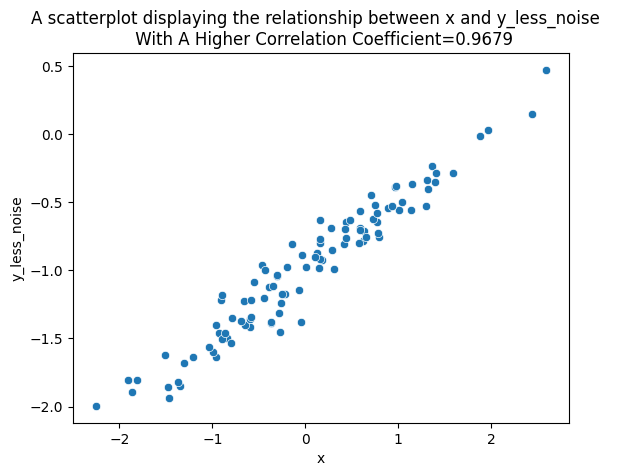

In [18]:
## generating the data with same coefficients but less noise (eps/2): y_more_noise
y_less_noise = b0+ b1*x + eps/2

# Create a scatterplot displaying the relationship between x and y_less_noise. Comment on what you observe
sns.scatterplot(x=x,y=y_less_noise)
plt.xlabel("x")
plt.ylabel("y_less_noise")
plt.title('A scatterplot displaying the relationship between x and y_less_noise  \n With A Higher Correlation Coefficient=' + str(round(np.corrcoef(x, y_less_noise)[0,1],4)))
plt.show()

#get Pearson correlation coefficient between x & y_less_noise
#np.corrcoef(x, y_less_noise)[0,1]

## Comments based on my observation:
The scatter plot reveals an even stronger positive correlation between the two vectors 𝑥 and $𝑦_{less noise}$. This is expected based on the equation used to generate $𝑦_{less noise}$ = −1+0.5𝑥+𝜖/2  , where a smaller epsilon introduces less noise

In [19]:
# Fit a least squares linear model to predict y using x . Comment on the model obtained. How do claculated/predicted coefficients compared to real coefficients ?
my_dict_ls_ns = { 'x_col' : x, 'y_col' : y_less_noise }
my_df_ls_ns = pd.DataFrame(data=my_dict_ls_ns)
#my_df.head()
lm_ls_ns=LinearRegression()
lm_ls_ns.fit(X=my_df[['x_col']],y=my_df_ls_ns[['y_col']])

# Evaluate Model Performance / Check value of R^2 to see quality of fit :
#print(lr.score(X=my_df[['x_col']],y=my_df[['y_col']]))

LinearRegression()

# How do $\hat{\beta}_{0}, \hat{\beta}_{1} $ coefficients compared to ${\beta}_{0}, {\beta}_{1} $ (_real_intercept_ = -1, _real_coeff_ = 0.5) <u><b>But With Less Noise used to generate the data?</b></u>


In [20]:
b0_hat_ls_ns = lm_ls_ns.intercept_[0]
b1_hat_ls_ns = lm_ls_ns.coef_[0][0]

print("b0=", b0, "- b0_hat_ls_ns=",b0_hat,"diff=", round(abs((b0_hat_ls_ns-b0)/b0) * 100,2) , "%")
print("b1=", b1, "- b1_hat_ls_ns=",b1_hat,"diff=" , round(abs((b1_hat_ls_ns-b1)/b1) * 100,2), "%")

#print("b0=", b0, "while b0_hat=",b0_hat_ls_ns)
#print("b1=", b1, "while b1_hat=",b1_hat_ls_ns)

b0= -1 - b0_hat_ls_ns= -0.9846266618057191 diff= 0.77 %
b1= 0.5 - b1_hat_ls_ns= 0.5041381915925813 diff= 0.41 %


<Axes: >

Text(0.5, 0, 'x')

Text(0, 0.5, 'y_less_noise')

Text(0.5, 1.0, 'A scatterplot displaying the relationship between x and y_less_noise')

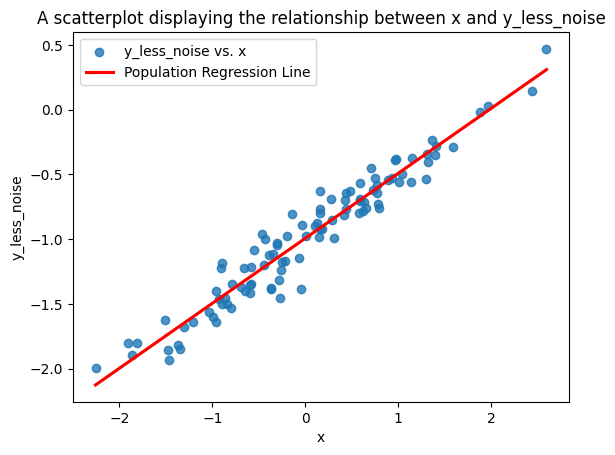

In [21]:
# Display the least squares line on the scatterplot obtained in part 4. Draw the population regression line on the plot, in a different color.
# Create an appropriate legend.
sns.regplot(x=x,y=y_less_noise,ci=None,line_kws=dict(color="r"))
plt.xlabel("x")
plt.ylabel("y_less_noise")
plt.title('A scatterplot displaying the relationship between x and y_less_noise')

#sns.regplot(x,y)
plt.legend(labels=['y_less_noise vs. x','Population Regression Line'])
plt.show()

<Axes: >

Text(0.5, 0, 'x')

Text(0, 0.5, 'y_more_noise')

Text(0.5, 1.0, 'A scatterplot displaying the relationship between x and y_more_noise  \n With A Higher Correlation Coefficient=0.698')

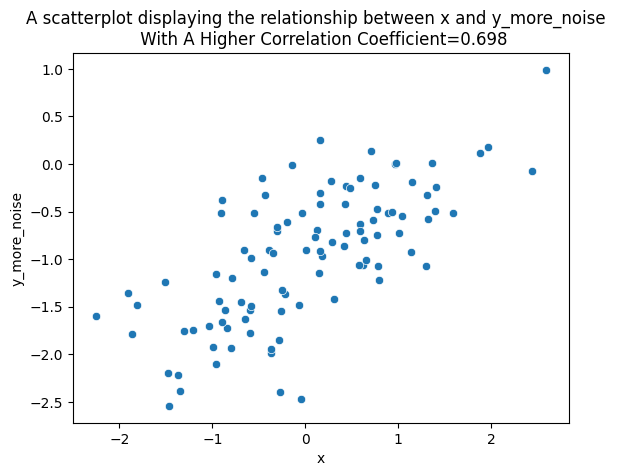

In [22]:
## generating the data with same coefficients but more noise (eps*2): y_more_noise
y_more_noise = b0+ b1*x + eps*2

# Create a scatterplot displaying the relationship between x and y_more_noise. Comment on what you observe
sns.scatterplot(x=x,y=y_more_noise)
plt.xlabel("x")
plt.ylabel("y_more_noise")
plt.title('A scatterplot displaying the relationship between x and y_more_noise  \n With A Higher Correlation Coefficient=' + str(round(np.corrcoef(x, y_more_noise)[0,1],4)))
plt.show()

#get Pearson correlation coefficient between x & y_more_noise
#np.corrcoef(x, y_more_noise)[0,1]

## Comments based on my observation:
The scatter plot indicates a weaker correlation between the two vectors: 𝑥 and $𝑦_{more noise}$. This result is expected, given that the equation used to generate $𝑦_{more noise}$ = −1+0.5𝑥+𝜖*2  , as it includes a higher value for epsilon, introducing more noise.

In [23]:
# Fit a least squares linear model to predict y using x . Comment on the model obtained. How do claculated/predicted coefficients compared to real coefficients ?
my_dict_mr_ns = { 'x_col' : x, 'y_col' : y_more_noise }
my_df_mr_ns = pd.DataFrame(data=my_dict_mr_ns)
#my_df.head()
lm_mr_ns=LinearRegression()
lm_mr_ns.fit(X=my_df_mr_ns[['x_col']],y=my_df_mr_ns[['y_col']])

# Evaluate Model Performance / Check value of R^2 to see quality of fit :
#print(lr.score(X=my_df[['x_col']],y=my_df[['y_col']]))

LinearRegression()

# How do $\hat{\beta}_{0}, \hat{\beta}_{1} $ coefficients compared to ${\beta}_{0}, {\beta}_{1} $ (_real_intercept_ = -1, _real_coeff_ = 0.5) <u><b>But With More Noise used to generate the data?</b></u>

In [24]:
b0_hat_mr_ns = lm_mr_ns.intercept_[0]
b1_hat_mr_ns = lm_mr_ns.coef_[0][0]

print("b0=", b0, "- b0_hat_mr_ns=",b0_hat,"diff=", round(abs((b0_hat_mr_ns-b0)/b0) * 100,2) , "%")
print("b1=", b1, "- b1_hat_mr_ns=",b1_hat,"diff=" , round(abs((b1_hat_mr_ns-b1)/b1) * 100,2), "%")

#print("b0=", b0, "while b0_hat=",b0_hat_ls_ns)
#print("b1=", b1, "while b1_hat=",b1_hat_ls_ns)

b0= -1 - b0_hat_mr_ns= -0.9846266618057191 diff= 3.07 %
b1= 0.5 - b1_hat_mr_ns= 0.5041381915925813 diff= 1.66 %


<Axes: >

Text(0.5, 0, 'x')

Text(0, 0.5, 'y_more_noise')

Text(0.5, 1.0, 'A scatterplot displaying the relationship between x and y_more_noise')

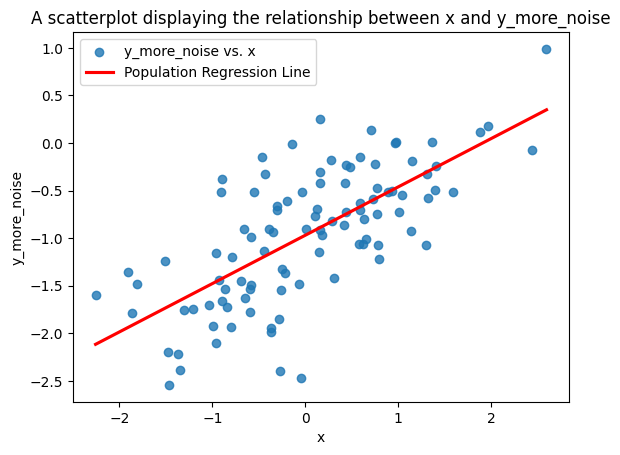

In [25]:
# Display the least squares line on the scatterplot obtained in part 4. Draw the population regression line on the plot, in a different color.
# Create an appropriate legend.
sns.regplot(x=x,y=y_more_noise,ci=None,line_kws=dict(color="r"))
plt.xlabel("x")
plt.ylabel("y_more_noise")
plt.title('A scatterplot displaying the relationship between x and y_more_noise')

#sns.regplot(x,y)
plt.legend(labels=['y_more_noise vs. x','Population Regression Line'])
plt.show()

In [26]:
#noise_list=["normal noise=eps", "less noise = eps/2", "more noise = eps*2"]
#b0_coef=[abs(b0_hat*100), abs(b0_hat_ls_ns*100), abs(b0_hat_mr_ns*100)]
#b1_coef=[b1_hat*100, b1_hat_ls_ns*100, b1_hat_mr_ns*100]

#df2 = pd.DataFrame({'noise_level':noise_list,'b0_coef':b0_coef,'b1_coef':b1_coef})

#g = sns.barplot(x=noise_list,y=b0_coef,native_scale=True)
#g = sns.lineplot(x=noise_list,y=b0_coef)
#g = sns.lineplot(x=noise_list,y=b1_coef)

#g.set_yscale("log")
#plt.show()